In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# X and y

In [3]:
X=pd.get_dummies(df.drop('class',axis=1),drop_first=True)
y=df['class']

# Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.15,random_state=42)

#  Model-Gradient Boosting

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
help (GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a sin

In [7]:
#first model should be with default parameters
gb_model=GradientBoostingClassifier()

In [8]:
#fit the model with training data set
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [9]:
#predict over X_train and predict over X_test
y_pred_train=gb_model.predict(X_train)
y_pred_test=gb_model.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

1.0
1.0


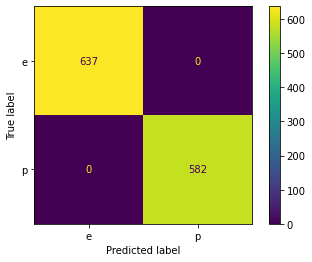

In [11]:
from sklearn.metrics import plot_confusion_matrix
print(plot_confusion_matrix(gb_model,X_test,y_test))

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       637
           p       1.00      1.00      1.00       582

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
gb_model=GradientBoostingClassifier()
param_grid={"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [15]:
grid=GridSearchCV(gb_model,param_grid,cv=5,scoring='accuracy')

In [16]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]},
             scoring='accuracy')

In [18]:
grid.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [19]:
predictions=grid.predict(X_test)

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       637
           p       1.00      1.00      1.00       582

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



# Feature Importance

In [22]:
grid.best_estimator_.feature_importances_

array([6.10204427e-04, 1.00921732e-16, 0.00000000e+00, 0.00000000e+00,
       1.14548294e-15, 1.60251754e-03, 3.85695702e-16, 2.22592021e-04,
       1.16135666e-17, 0.00000000e+00, 5.04754488e-19, 0.00000000e+00,
       2.94051944e-16, 0.00000000e+00, 0.00000000e+00, 1.94358592e-06,
       0.00000000e+00, 6.84720312e-02, 0.00000000e+00, 1.42023897e-02,
       6.36152485e-03, 1.77607067e-03, 6.19584610e-01, 1.53271608e-02,
       0.00000000e+00, 0.00000000e+00, 1.25359437e-07, 3.17964920e-03,
       2.68041717e-03, 0.00000000e+00, 1.22814428e-19, 1.40275282e-16,
       0.00000000e+00, 6.51181985e-16, 0.00000000e+00, 4.32339797e-16,
       2.86008902e-16, 7.94213539e-24, 1.21486476e-16, 0.00000000e+00,
       0.00000000e+00, 3.90570813e-04, 1.14178229e-01, 2.15027462e-02,
       2.41446418e-02, 0.00000000e+00, 3.31796312e-03, 1.72318126e-09,
       0.00000000e+00, 9.20697322e-18, 4.41453110e-02, 3.62050437e-08,
       0.00000000e+00, 0.00000000e+00, 3.53798102e-09, 0.00000000e+00,
      

In [29]:
imp_feats=pd.DataFrame(index=X.columns,data=grid.best_estimator_.feature_importances_,columns=['Importance'])
imp_feats

,Importance
cap-shape_c,6.102044e-04
cap-shape_f,1.009217e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,1.145483e-15
...,...
habitat_l,7.069595e-06
habitat_m,2.263614e-16
habitat_p,0.000000e+00
habitat_u,6.925569e-17


In [30]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
odor_n,0.619585
stalk-root_c,0.114178
bruises_t,0.068472
stalk-surface-below-ring_y,0.044145
spore-print-color_r,0.033743
...,...
stalk-color-below-ring_o,0.000000
gill-color_o,0.000000
stalk-color-below-ring_w,0.000000
stalk-color-below-ring_y,0.000000


In [33]:
imp_feats.describe()

,Importance
count,23.000000
mean,0.043440
std,0.128457
min,0.000610
25%,0.001689
50%,0.006362
75%,0.022824
max,0.619585


In [32]:
imp_feats=imp_feats[imp_feats['Importance']>0.000527]

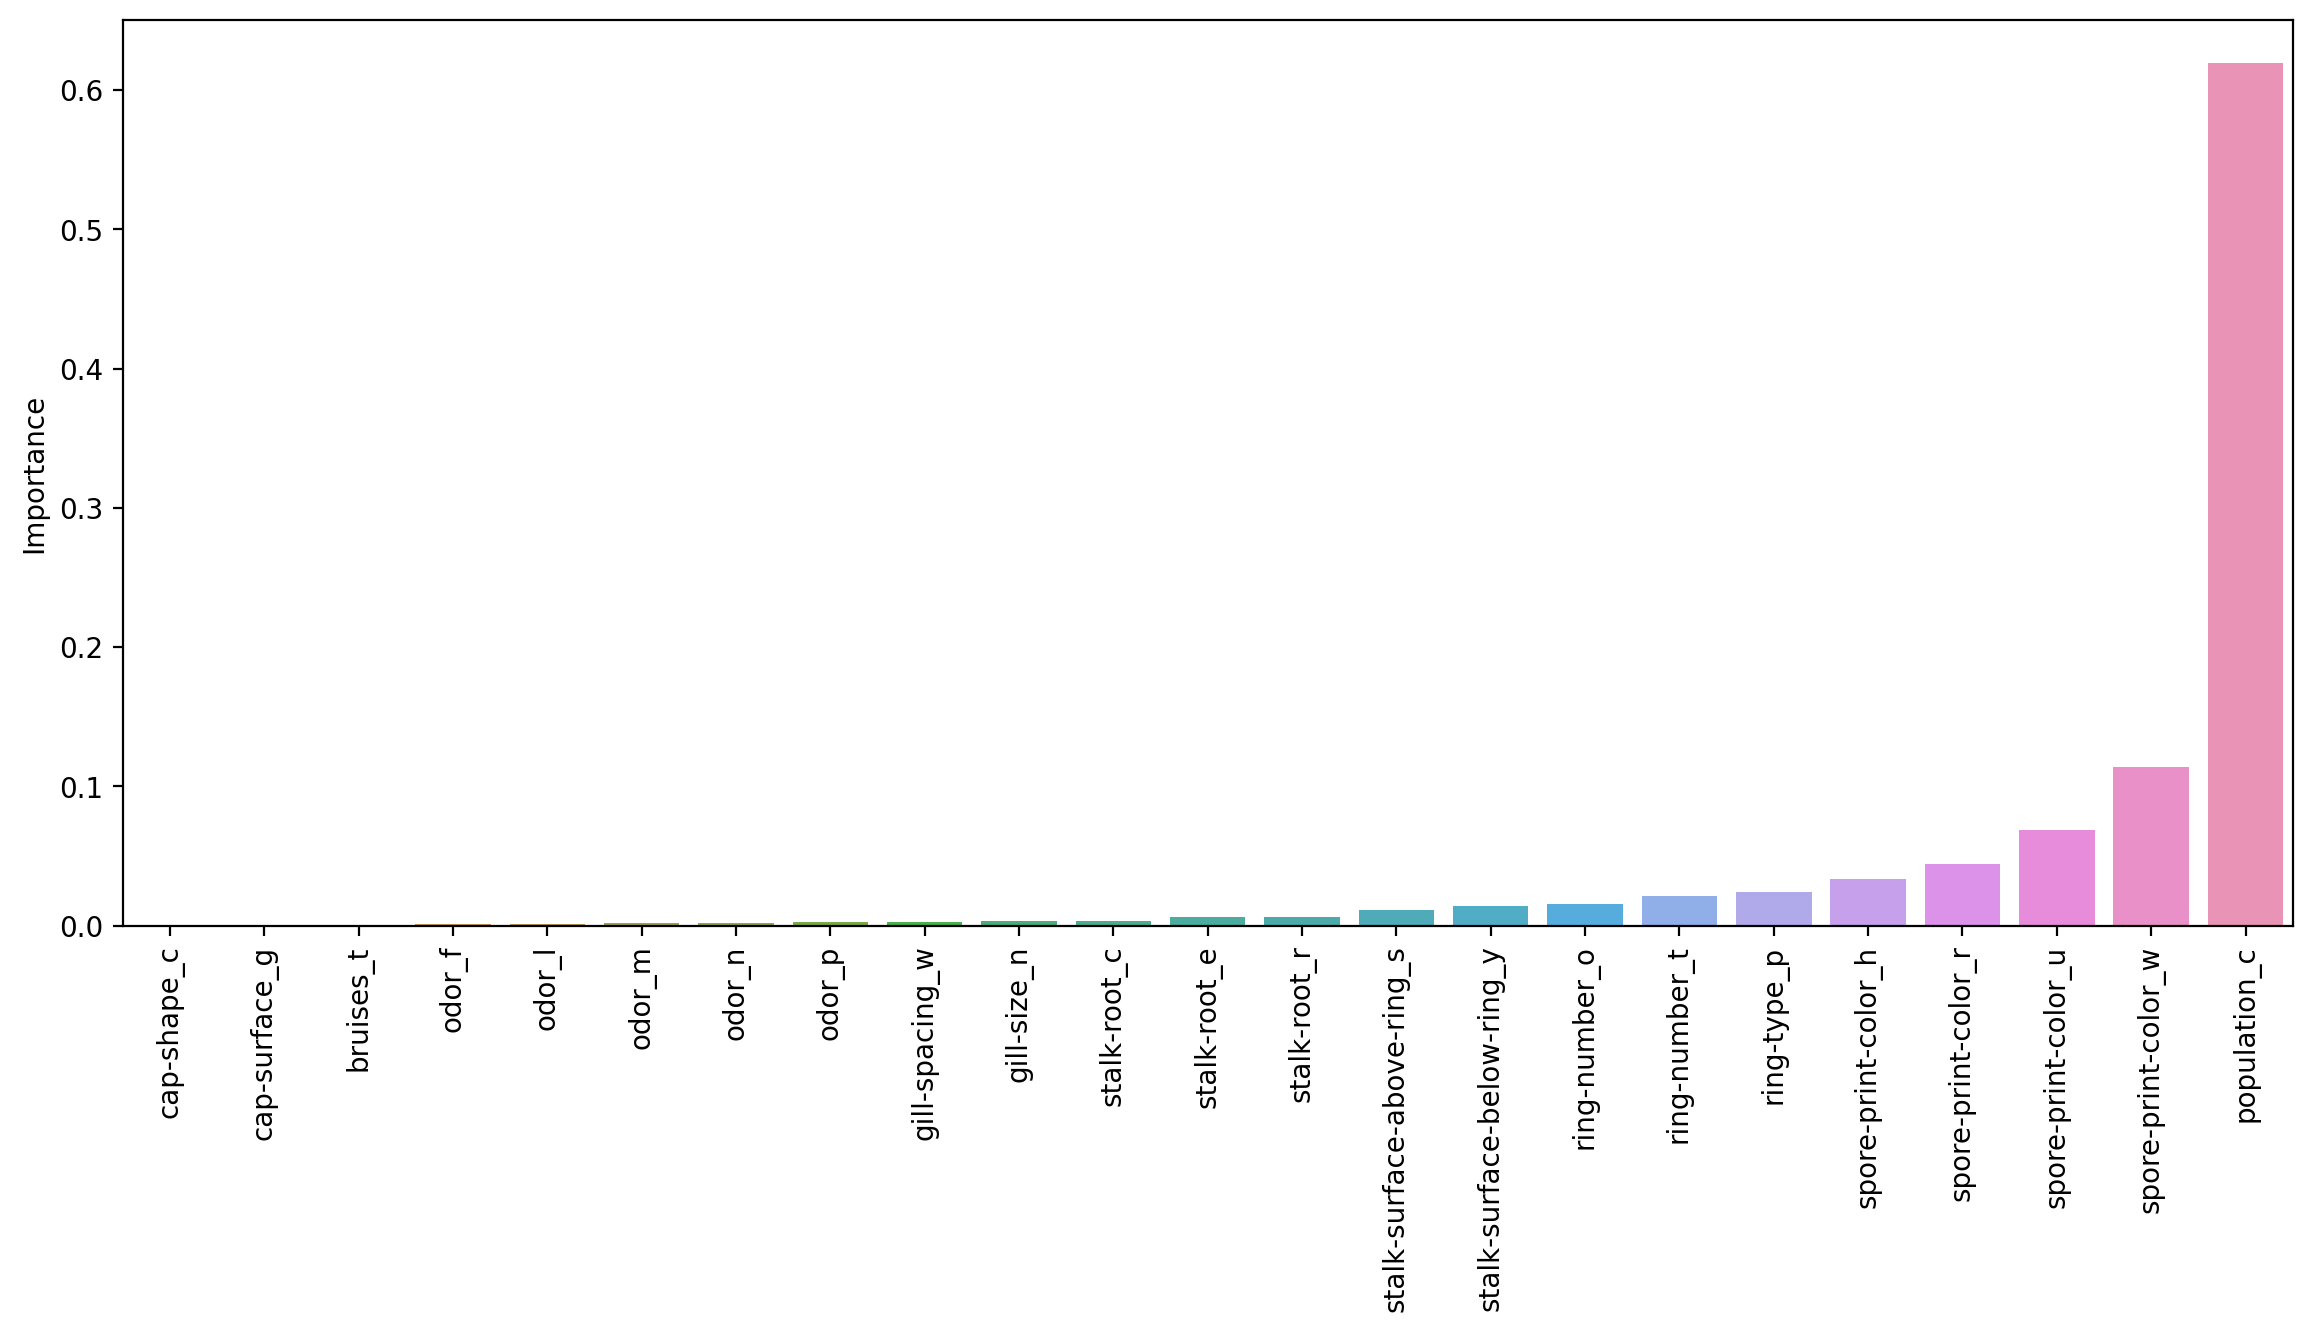

In [34]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values("Importance"),x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);